### Лабораторная работа №3: Visualisation  
##### Деев Григорий Тимофеевич

0. [загрузка данных](#0)
1. [Matplotlib](#1)
2. [pandas](#2)
3. [Seaborn](#3)
4. [QQ](#2)
5. [plotly](#3)

##### <a name="0"></a>	загрузка данных
Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий (либо если такой датасет вам найти сложно, придётся разные датасеты для разных пунктов задания использовать)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
df = pd.read_csv(r'Stars.csv')
df.head(10)

Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0
5         2840  0.000650  0.1100  16.98   Red              M     0
6         2637  0.000730  0.1270  17.22   Red              M     0
7         2600  0.000400  0.0960  17.40   Red              M     0
8         2650  0.000690  0.1100  17.45   Red              M     0
9         2700  0.000180  0.1300  16.05   Red              M     0

##### <a name="1"></a>	Matplotlib

i. Построить любой график (любого рода) с помощью чистого matplotlib / pylab

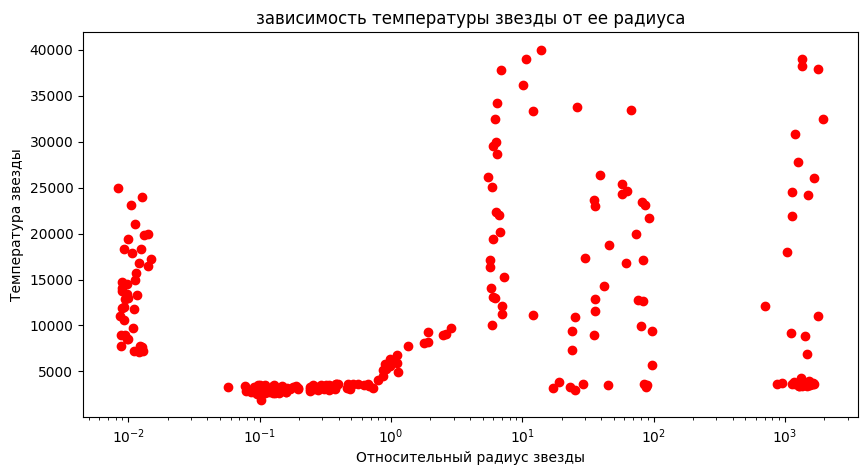

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df.R, df.Temperature, color='red')
ax.set_xscale('log')
ax.set(title='зависимость температуры звезды от ее радиуса', xlabel='Относительный радиус звезды', ylabel='Температура звезды')
plt.show()

ii. Построить несколько суб-графиков на одном графике используя .subplot.

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df[0:50].index, df[0:50].Temperature)
ax[0].set(title = "Температура звёзд на срезе [0:50]")

ax[1].barh(df.Color, df.Temperature, color='#8805A8')
ax[1].set(title ="Средняя температура звезд определённого цвета")

plt.show()

##### <a name="2"></a>	pandas
На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).
Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

In [25]:
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
wine['bitterness'] = wine['ash'] / wine['magnesium'] * 100
wine['color'] = 0
for i in range(wine.index[-1] + 1):
    if(wine.color_intensity[i] > wine.color_intensity.mean()):
        wine.color[i] = 'red'
    else:
        wine.color[i] = 'white'
wine['taste'] = 0
for i in range(wine.index[-1] + 1):
    if(wine.bitterness[i] > wine.bitterness.mean()):
        wine.taste[i] = 'dry'
    else:
        wine.taste[i] = 'sweet'
wine

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  bitterness  color  taste  
0                            3.92   1065.0    1.913386    red  sweet  
1                            3.40   1050.0    2.140000  white  sweet  
2                            3.17   1185.0    2.643564    red    dry  
3                            3.45   1480.0    2.212389    red  sweet  
4                            2.93    735.0    2.432203  white    dry  
..                            ...      ...         ...    ...    ...  
173                          1.74    740.0    2.578947    red    dry  
174                          1.56    750.0    2.431373    red    dry  
175                          1.56    835.0    1.883333    red  sweet  
176                          1.62    840.0    1.975000    red  sweet  
177                          1.60    560.0    2.854167    red    dry  

[178 rows x 16 columns]

<AxesSubplot: ylabel='Ratio colors of wine in Dataset'>

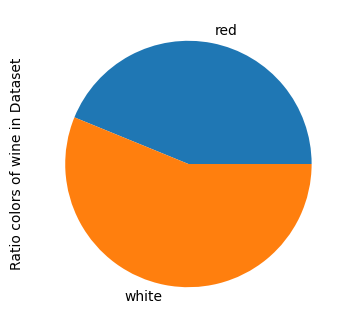

In [29]:
temp = []
temp.append(wine[wine.color == 'red'].alcohol.count())
temp.append(wine[wine.color == 'white'].alcohol.count())
df4 = pd.Series(temp, index=['red', 'white'], name='Ratio colors of wine in Dataset')
df4.plot.pie(figsize=(4, 4))

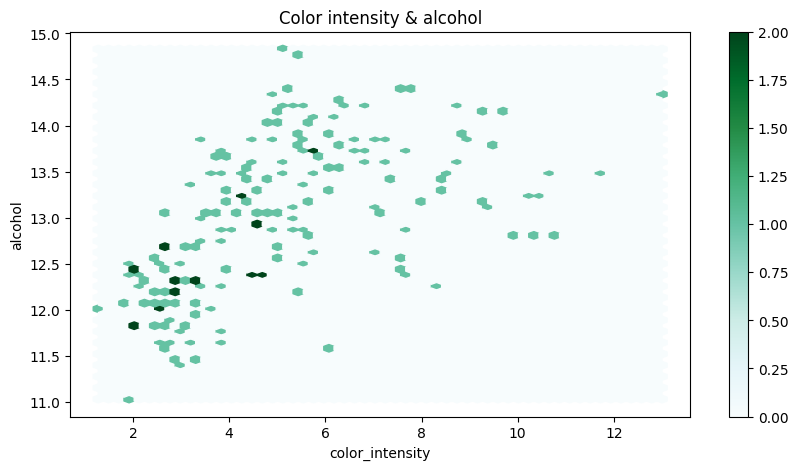

In [31]:
wine.plot.hexbin(x="color_intensity", 
                 y="alcohol", 
                 gridsize=55,
                 title='Color intensity & alcohol',
                 figsize=(10, 5),
                 reduce_C_function=np.max,
                 )
plt.show()

##### <a name="3"></a>	Seaborn

i. Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

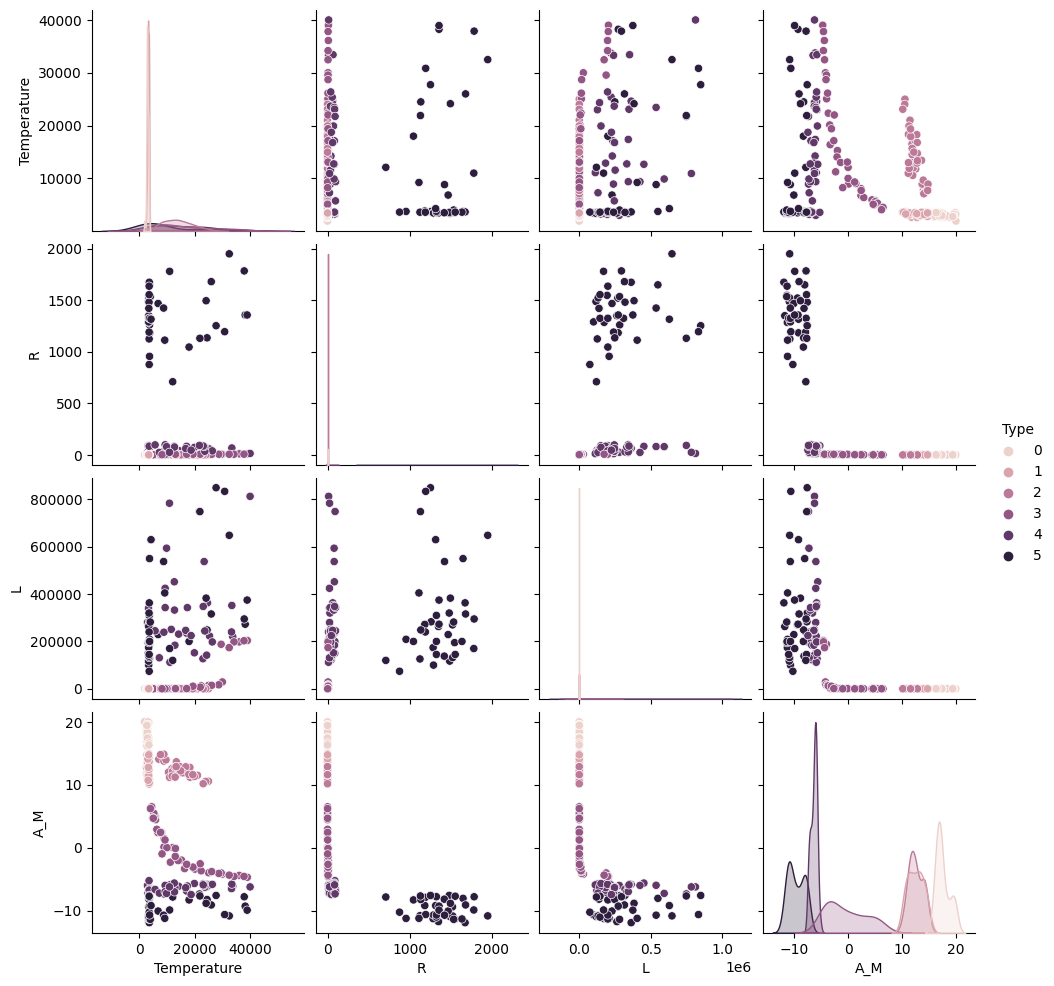

In [32]:
sns.pairplot(df[['Temperature', 'R', 'L', 'A_M', "Type"]], hue="Type")
plt.show()

ii. Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

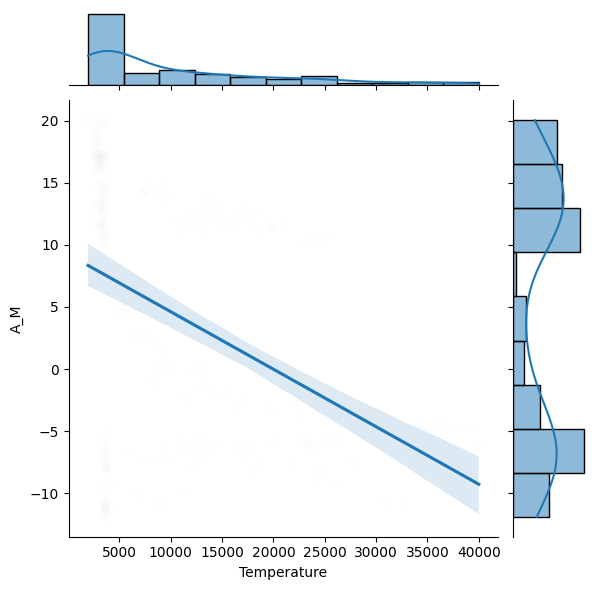

In [33]:
sns.jointplot(data=df, 
              x="Temperature", 
              y="A_M", 
              kind="reg",
              joint_kws = {'scatter_kws':dict(alpha=0.005)})
plt.show()

iii. Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

In [34]:
sns.boxplot(x=df["Temperature"])

<AxesSubplot: xlabel='Temperature'>

iv. Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика!)

In [35]:
corr = df.drop(['Type', 'Color', 'Spectral_Class'], axis=1).corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

##### <a name="4"></a>	QQ
Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

In [37]:
from scipy import stats
flights = sns.load_dataset("flights")

In [40]:
pylab.figure(figsize=(10,5))
pylab.subplot(2,2,1)
stats.probplot( df.Temperature, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
df.Temperature.hist()

<AxesSubplot: >

##### <a name="5"></a>	plotly
Построить любой график (связанный с вашими данными!) с помощью plotly

In [43]:
import plotly.express as px

In [50]:
fig = px.bar(df, x='Type', y='L')
fig.show()